# Tek Örneklem T Testi

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

* İş Uygulaması : Web Sitesinde Geçirilen Sürenin Testi

* Problem : Web sitemizde geçirilen ortalama sure gercekten 170 saniye mi ?

* Detaylar : 
    * Elimizde web sitesinde geçirilen ort sureler var
    * Bu veriler incelendiğinde bir yonetıcı ya da çalışanımız bu degerlerin böyle olmadıgına yönelik düşünceler taşıyor ve bu durumu test etmek istiyor

In [2]:
import numpy as np

In [3]:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [4]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [5]:
import scipy.stats as stats

In [6]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

## Varsayımlar

In [7]:
# Normallik Varsayımı 

In [8]:
# Histogram

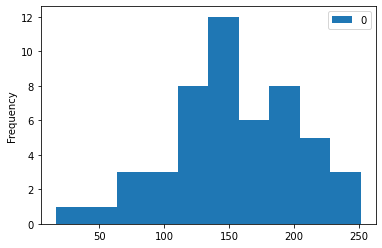

In [9]:
import pandas as pd
pd.DataFrame(olcumler).plot.hist();

In [10]:
# qqplot

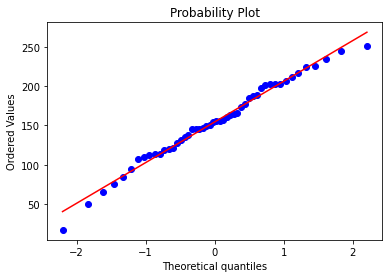

In [11]:
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

## Shapiro-Wilks Testi

In [13]:
from scipy.stats import shapiro

In [14]:
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [15]:
# Eğer pvalue 0.05 degerinden kçükse H0 hipotezi reddedilir. Bu durumda H0 reddedilemez

In [16]:
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-value: " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan P-value: 0.7848747968673706


## Hipotez Testinin Uygulanması

In [17]:
stats.ttest_1samp(olcumler, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [18]:
# pvalue 0.05 değerinden küçük oldugundan H0 hipotezi reddedilir 

## Nonparametrik Tek Örneklem Testi

In [19]:
from statsmodels.stats.descriptivestats import sign_test

In [20]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227219)

# Tek Örneklem Oran Testi

* İş Uygulaması: Dönüşüm Oranı Testi

* Problem : Reklama ilişkin dönüşüm oranı 0.125 olmasına rağmen bu yüksek oran ve gelirler birbiriyle örtüşmüyor.

* Detaylar : 
    * 500 kişi dış mecrada reklama tıklamıs,40 tanesi sitede alısveris yapmıs
    * Örnek üzerinden elde edilen dönüşüm oranı = 40/500 = 0.08

HO: p = 0.125 

H1: p != 0.125

In [22]:
from statsmodels.stats.proportion import proportions_ztest

In [23]:
count = 40 # basarı sayısı
nobs = 500 # gozlem sayısı
value = 0.125 # test etmek istenilen deger

In [24]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

In [25]:
# pvalue 0.05 degerinden kucuk oldugundan H0 hipotezi reddedilir.

In [26]:
# Ürün satın alımına yönelik olarak %95 guven ile test ettiğimiz 0.125 değerinin yanlış oldugunu soylerız.

## Bağımsız İki Örneklem T Testi (AB Testi)

* İş Uygulaması : ML Modelinin Başarı Testi(AB)

* Problem : Bir ML projesine yatırım yapılmış.Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadıgı test edilmek isteniyor.
* Detaylar : 
    * Model geliştirilmiş ve web sitesine entegre edilmiş.
    * Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun.
    * A grubu eski B grubu yeni sistem
    * Gelir anlamında anlamlı bir iş yapılıp yapılmadıgı test edilmek isteniyor.

H0: M1 = M2 

H1: M1 != M2

In [27]:
#VERI TIPI I

In [28]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [29]:
#VERI TIPI II

In [30]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


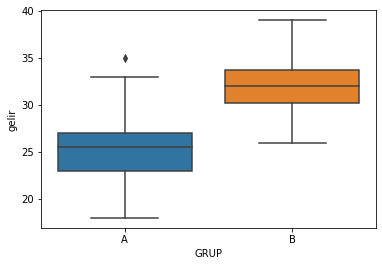

In [31]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

## Varsayım Kontrolu

In [32]:
A_B.head() # Veri Tipi I

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [33]:
AB.head() # Veri Tipi II

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [34]:
# Normallik Varsayımı

In [35]:
from scipy.stats  import shapiro

In [36]:
shapiro(A_B.A) # H0 reddedilemez

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [38]:
shapiro(A_B.B) # H0 reddedilemez. Varsayım saglanmaktadır

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

In [39]:
#varyans homojenligi varsayımı

H0: Varyanslar Homojendir

H1: Varyanslar Homojen Değildir

In [41]:
stats.levene(A_B.A, A_B.B) 

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [42]:
## Hipotez Testi

In [43]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [44]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


In [45]:
# Eski sistem ile yeni sistem arasında gelirler göz önünde bulundugunda istatistiki 
# olarak anlamlı bi farklılık vardır ve bu fark yeni sistemin lehinedir 

## Nonparametrik Bağımsız İki Örneklem Testi

In [46]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [47]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000
